# Predict gender from resume texts
In this notebook resume data will be used and cleaned to make calculations on the predicted gender of the participant.
After, a multitude of algorithms will be used to find out which one performs best at predicting gender based on the qualities of the applicant. Resumes are now, compared to the previous tests, more elaborate on their texts and more sufficiently divided into categories. This way, hopefully, texts from some columns will be more valuable in order to make a more accurate prediction.

In [2]:
import pandas as pd
import re 
import math
df = pd.read_csv('resumes.csv', delimiter= ';')
df.head()

,name,gender,skills,experience,education,personal_qualities
0,Amy,female,"•\tTrained in accounting softwares, Aexeo, Ag...",Citco Fund Services (Singapore) Pte Ltd ...,Royal Melbourne Institute of Technology (RMIT)...,Fund accountant with nearly 2 years of experie...
1,Ben,male,"•\tMs Office (Excel, Word and PowerPoint)\n•\t...",Fund Accoutant\tSep 2016 - Present\n(Citco Fun...,BSc (Hons) Accounting and Finance\tSep 2012 – ...,NaN
2,Carrie,female,"Languages Spoken: English, Mandarin \nLan...",Citco Fund Services (Singapore) Pte Ltd\t\t\t ...,Murdoch University \t\t ...,NaN
3,Crystal,female,"Courses Attended:\nUBS in Accounting, April 20...",\nJul 2013 - Present\n(3 years 10 months)\tCor...,\n2014\tKaplan Higher Education Institute\nBac...,NaN
4,Dickson,male,"•\tKnowledge of Microsoft Office (Excel, Words...",\nConifer Financial Services\nMay 2015 – Prese...,Institution\tYear of Completion\tQualification...,NaN


In [9]:
df.groupby(['gender']).count()

,name,skills,experience,education,personal_qualities
gender,,,,,
female,118,110,118,118,112
female,2,2,2,2,2
male,131,121,130,131,125


In [10]:
df['gender'] = df['gender'].str.replace(' +$', '')
df.groupby(['gender']).count()

,name,skills,experience,education,personal_qualities
gender,,,,,
female,120,112,120,120,114
male,131,121,130,131,125


In [11]:
df['skills'] = df['skills'].str.replace('[^A-Za-z0-9]+', ' ').str.lower()
df['experience'] = df['experience'].str.replace('[^A-Za-z0-9]+', ' ').str.lower()
df['education'] = df['education'].str.replace('[^A-Za-z0-9]+', ' ').str.lower()
df['personal_qualities'] = df['personal_qualities'].str.replace('[^A-Za-z0-9]+', ' ').str.lower()
df.head()

,name,gender,skills,experience,education,personal_qualities
0,Amy,female,trained in accounting softwares aexeo agresso...,citco fund services singapore pte ltd jan 2016...,royal melbourne institute of technology rmit j...,fund accountant with nearly 2 years of experie...
1,Ben,male,ms office excel word and powerpoint proficien...,fund accoutant sep 2016 present citco fund ser...,bsc hons accounting and finance sep 2012 may 2...,NaN
2,Carrie,female,languages spoken english mandarin language wri...,citco fund services singapore pte ltd may 2016...,murdoch university may 2014 mar 2016 kaplan si...,NaN
3,Crystal,female,courses attended ubs in accounting april 2005 ...,jul 2013 present 3 years 10 months corporate ...,2014 kaplan higher education institute bachel...,NaN
4,Dickson,male,knowledge of microsoft office excel words pow...,conifer financial services may 2015 present t...,institution year of completion qualification a...,NaN


In [12]:
for index,row in df.iterrows():
    for column in df[['skills', 'experience', 'personal_qualities']]:
        no_digits = []
        # Iterate through the string, adding non-numbers to the no_digits list
        if(type(row[column]) == str):
            for i in row[column]:
                if not i.isdigit():
                    no_digits.append(i)
        # Now join all elements of the list with '', 
        # which puts all of the characters together.
            result = ''.join(no_digits)
            df.loc[index,column] = result
        
df

,name,gender,skills,experience,education,personal_qualities
0,Amy,female,trained in accounting softwares aexeo agresso...,citco fund services singapore pte ltd jan pre...,royal melbourne institute of technology rmit j...,fund accountant with nearly years of experien...
1,Ben,male,ms office excel word and powerpoint proficien...,fund accoutant sep present citco fund service...,bsc hons accounting and finance sep 2012 may 2...,NaN
2,Carrie,female,languages spoken english mandarin language wri...,citco fund services singapore pte ltd may pre...,murdoch university may 2014 mar 2016 kaplan si...,NaN
3,Crystal,female,courses attended ubs in accounting april ubs ...,jul present years months corporate secreta...,2014 kaplan higher education institute bachel...,NaN
4,Dickson,male,knowledge of microsoft office excel words pow...,conifer financial services may present team ...,institution year of completion qualification a...,NaN
...,...,...,...,...,...,...
246,Winnie,female,singapore financial reporting standards malay...,designation accountant july present organisa...,professional qualification association of char...,an ambitious and enthusiastic chartered accoun...
247,Zenda,female,intermediate photoshop cs,sep present years months research analyst ...,2014 national university of singapore bachelor...,NaN
248,Monna Liza,female,microsoft office word advanced excel power po...,mc corporate service pte ltd coleman st the ...,bachelor of science in accountancy university...,excellent team building leadership communicat...
249,Alvin,male,able to converse well in english mandarin and...,company mdr limited listed in singapore stock ...,i was my school representative for badminton c...,a competent professional who is capable of und...


In [13]:
for index,row in df.iterrows():
    no_digits = []
    for i in row['education']:
        if not i.isdigit():
                    no_digits.append(i)
        # Now join all elements of the list with '', 
        # which puts all of the characters together.
        result = ''.join(no_digits)
        df.loc[index,'education'] = result
        
df

,name,gender,skills,experience,education,personal_qualities
0,Amy,female,trained in accounting softwares aexeo agresso...,citco fund services singapore pte ltd jan pre...,royal melbourne institute of technology rmit j...,fund accountant with nearly years of experien...
1,Ben,male,ms office excel word and powerpoint proficien...,fund accoutant sep present citco fund service...,bsc hons accounting and finance sep may univ...,NaN
2,Carrie,female,languages spoken english mandarin language wri...,citco fund services singapore pte ltd may pre...,murdoch university may mar kaplan singapore ...,NaN
3,Crystal,female,courses attended ubs in accounting april ubs ...,jul present years months corporate secreta...,kaplan higher education institute bachelor s...,NaN
4,Dickson,male,knowledge of microsoft office excel words pow...,conifer financial services may present team ...,institution year of completion qualification a...,NaN
...,...,...,...,...,...,...
246,Winnie,female,singapore financial reporting standards malay...,designation accountant july present organisa...,professional qualification association of char...,an ambitious and enthusiastic chartered accoun...
247,Zenda,female,intermediate photoshop cs,sep present years months research analyst ...,national university of singapore bachelor s l...,NaN
248,Monna Liza,female,microsoft office word advanced excel power po...,mc corporate service pte ltd coleman st the ...,bachelor of science in accountancy university...,excellent team building leadership communicat...
249,Alvin,male,able to converse well in english mandarin and...,company mdr limited listed in singapore stock ...,i was my school representative for badminton c...,a competent professional who is capable of und...


In [14]:
df['femaleConfirmed'] = 0;
df['maleConfirmed'] = 0;
df

,name,gender,skills,experience,education,personal_qualities,femaleConfirmed,maleConfirmed
0,Amy,female,trained in accounting softwares aexeo agresso...,citco fund services singapore pte ltd jan pre...,royal melbourne institute of technology rmit j...,fund accountant with nearly years of experien...,0,0
1,Ben,male,ms office excel word and powerpoint proficien...,fund accoutant sep present citco fund service...,bsc hons accounting and finance sep may univ...,NaN,0,0
2,Carrie,female,languages spoken english mandarin language wri...,citco fund services singapore pte ltd may pre...,murdoch university may mar kaplan singapore ...,NaN,0,0
3,Crystal,female,courses attended ubs in accounting april ubs ...,jul present years months corporate secreta...,kaplan higher education institute bachelor s...,NaN,0,0
4,Dickson,male,knowledge of microsoft office excel words pow...,conifer financial services may present team ...,institution year of completion qualification a...,NaN,0,0
...,...,...,...,...,...,...,...,...
246,Winnie,female,singapore financial reporting standards malay...,designation accountant july present organisa...,professional qualification association of char...,an ambitious and enthusiastic chartered accoun...,0,0
247,Zenda,female,intermediate photoshop cs,sep present years months research analyst ...,national university of singapore bachelor s l...,NaN,0,0
248,Monna Liza,female,microsoft office word advanced excel power po...,mc corporate service pte ltd coleman st the ...,bachelor of science in accountancy university...,excellent team building leadership communicat...,0,0
249,Alvin,male,able to converse well in english mandarin and...,company mdr limited listed in singapore stock ...,i was my school representative for badminton c...,a competent professional who is capable of und...,0,0


In [15]:
male_words=["men","mens","boy","boys"]
female_words=["women", "womens", "girl", "girls"]

In [16]:
#function to find whole word instead of 'men' in management
def findWord(s, w):
    return (' ' + w + ' ') in (' ' + s + ' ')


In [17]:
# Iterate over two given columns only from the dataframe
for column in df[['experience', 'education', 'personal_qualities']]:
    for index,row in df.iterrows():  
        if(pd.notna(row[column])):
        
            for item in female_words:
                female_match = findWord(row[column],item)
                if(female_match != False):
                    df.loc[index,'femaleConfirmed'] = 1
                    
            for item in male_words:
                male_match = findWord(row[column],item)
                if(male_match != False):
                    df.loc[index,'maleConfirmed'] = 1
        
df

,name,gender,skills,experience,education,personal_qualities,femaleConfirmed,maleConfirmed
0,Amy,female,trained in accounting softwares aexeo agresso...,citco fund services singapore pte ltd jan pre...,royal melbourne institute of technology rmit j...,fund accountant with nearly years of experien...,0,0
1,Ben,male,ms office excel word and powerpoint proficien...,fund accoutant sep present citco fund service...,bsc hons accounting and finance sep may univ...,NaN,0,0
2,Carrie,female,languages spoken english mandarin language wri...,citco fund services singapore pte ltd may pre...,murdoch university may mar kaplan singapore ...,NaN,0,0
3,Crystal,female,courses attended ubs in accounting april ubs ...,jul present years months corporate secreta...,kaplan higher education institute bachelor s...,NaN,0,0
4,Dickson,male,knowledge of microsoft office excel words pow...,conifer financial services may present team ...,institution year of completion qualification a...,NaN,0,0
...,...,...,...,...,...,...,...,...
246,Winnie,female,singapore financial reporting standards malay...,designation accountant july present organisa...,professional qualification association of char...,an ambitious and enthusiastic chartered accoun...,0,0
247,Zenda,female,intermediate photoshop cs,sep present years months research analyst ...,national university of singapore bachelor s l...,NaN,1,0
248,Monna Liza,female,microsoft office word advanced excel power po...,mc corporate service pte ltd coleman st the ...,bachelor of science in accountancy university...,excellent team building leadership communicat...,0,0
249,Alvin,male,able to converse well in english mandarin and...,company mdr limited listed in singapore stock ...,i was my school representative for badminton c...,a competent professional who is capable of und...,0,0


In [18]:
df['gender'] = df['gender'].factorize()[0]
df = df[pd.notnull(df['personal_qualities'])]
df

,name,gender,skills,experience,education,personal_qualities,femaleConfirmed,maleConfirmed
0,Amy,0,trained in accounting softwares aexeo agresso...,citco fund services singapore pte ltd jan pre...,royal melbourne institute of technology rmit j...,fund accountant with nearly years of experien...,0,0
7,Jonas,0,advanced as excel microsoft office outlook pow...,apr present year fund accountant citco fund ...,university of london bachelor s major banking ...,other information resourceful professional equ...,0,0
10,Lester,1,fluent english mandarin cantonese and hokkien,marketing client service executive aberdeen as...,recipient of the durham postgraduate award re...,market sector leader of the durham university ...,0,0
11,Magdalena,0,advanced compliance financial accounting,finance manager aberdeen asset management asia...,nanyang technological university bachelor s ma...,responsibilities specialised in performing ann...,0,0
13,Esther,0,advanced ifca investran mri ms office oracle o...,experience feb present years months senior ...,oxford brookes university bachelor s major b...,other information since graduation i have accu...,0,0
...,...,...,...,...,...,...,...,...
245,Kelly,0,ms office accounting system oracle peoplesoft ...,oct present mapletree commercial trust manage...,year jun sep institution sheffield hallam un...,able to work independently as an individual a...,0,0
246,Winnie,0,singapore financial reporting standards malay...,designation accountant july present organisa...,professional qualification association of char...,an ambitious and enthusiastic chartered accoun...,0,0
248,Monna Liza,0,microsoft office word advanced excel power po...,mc corporate service pte ltd coleman st the ...,bachelor of science in accountancy university...,excellent team building leadership communicat...,0,0
249,Alvin,1,able to converse well in english mandarin and...,company mdr limited listed in singapore stock ...,i was my school representative for badminton c...,a competent professional who is capable of und...,0,0


In [19]:
df.to_csv('resumesCleaned.csv', index=False)

## Prediction algorithms

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.personal_qualities).toarray()
labels = df.gender
features.shape

(239, 621)

In [1]:
gender_to_id = [0,1]

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['personal_qualities'], df['gender'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

## Performance of these algorithms

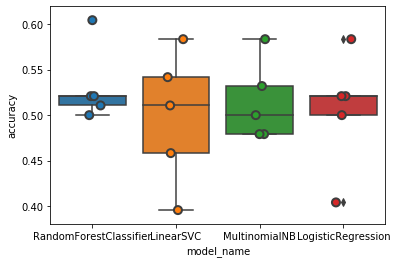

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

models = [
    RandomForestClassifier(n_estimators=100, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [276]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.497961
LogisticRegression        0.505851
MultinomialNB             0.514716
RandomForestClassifier    0.531294
Name: accuracy, dtype: float64

## Conclusion
All models still do a poor job at predicting a persons gender.